In [1]:
# Specification
# https://github.com/SBRG/bigg_models/wiki/BiGG-Models-ID-Specification-and-Guidelines

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import json

In [3]:
with open('../data/iND750.json', 'r') as file:
    models = json.loads(file.read())

## Data Preparation

In [4]:
# step 1: find one gene
# step 2: find the reactions which are ruled by this gene
# step 3: find the substrate (< 0) and products (> 0) of one of these reactions. Repeat for all reactions ruled by this gene.
# step 4: repeat above steps for all genes -- every gene has a list of substrates and products.
# step 5: if a product of gene A is a substrate of gene B, then gene A and gene B has a connection

In [5]:
genes = {}
inorganics = []
for gene in models['genes']:
    genes[gene['id']] = {}
    genes[gene['id']]['reactions'] = []
    genes[gene['id']]['substrates'] = []
    genes[gene['id']]['products'] = []
    for reaction in models['reactions']:
        if gene['id'] in reaction['gene_reaction_rule'] and gene['id'] not in genes[gene['id']]['reactions']:
            genes[gene['id']]['reactions'].append(reaction['id'])
            for metabolite, v in reaction['metabolites'].items():
                for m in models['metabolites']:
                    if m['id'] == metabolite:
                        # exclude inorganic metabolites
                        if 'C' in m['formula'] and m['formula'] not in ['CO2', 'CO', 'C']:
                            if v > 0 and metabolite not in genes[gene['id']]['products']:
                                genes[gene['id']]['products'].append(metabolite)
                            if v < 0 and metabolite not in genes[gene['id']]['substrates']:
                                genes[gene['id']]['substrates'].append(metabolite)
                        elif metabolite not in inorganics:
                            inorganics.append(metabolite)
                        else:
                            break
#                     if v == 1 and metabolite not in genes[gene['id']]['products']:
#                         genes[gene['id']]['products'].append(metabolite)
#                     if v == -1 and metabolite not in genes[gene['id']]['substrates']:
#                         genes[gene['id']]['substrates'].append(metabolite)
                            
for k0, v0 in genes.items():
    v0['links'] = []
    for product in v0['products']:
        for k1, v1 in genes.items():
            if k1 != k0 and product in v1['substrates']:
                v0['links'].append(k1)
                

In [6]:
df = pd.DataFrame.from_dict(genes).T
df

reactions  \
YER061C    [ACOATAm, FAS100ACPm, FAS120ACPm, FAS140ACPm, ...   
YLR304C                                      [ACONT, ACONTm]   
YPL231W    [FA120ACPHi, FA140ACPHi, FA141ACPHi, FA160ACPH...   
YBR023C                                              [CHTNS]   
YJL200C                                             [ACONTm]   
...                                                      ...   
YDR322C_A                                           [ATPS3m]   
YOL077W_A                                           [ATPS3m]   
YML081C_A                                           [ATPS3m]   
YHR001W_A                                         [CYOR_u6m]   
YCR073W_A                                              [PGL]   

                                                  substrates  \
YER061C    [ACP_m, accoa_m, malACP_m, nadph_m, ocACP_m, d...   
YLR304C                                       [cit_c, cit_m]   
YPL231W    [ddcaACP_c, myrsACP_c, tdeACP_c, palmACP_c, hd...   
YBR023C                                         [udpacgal_c]   
YJL200C                                              [cit_m]   
...                                                      ...   
YDR322C_A                                            [adp_m]   
YOL077W_A                                            [adp_m]   
YML081C_A                                            [adp_m]   
YHR001W_A                                 [ficytc_m, q6h2_m]   
YCR073W_A                                           [6pgl_c]   

                                                    products  \
YER061C    [acACP_m, coa_m, ACP_m, dcaACP_m, nadp_m, ddca...   
YLR304C                                     [icit_c, icit_m]   
YPL231W    [ACP_c, ddca_c, ttdca_c, ttdcea_c, hdca_c, hdc...   
YBR023C                                    [chitin_c, udp_c]   
YJL200C                                             [icit_m]   
...                                                      ...   
YDR322C_A                                            [atp_m]   
YOL077W_A                                            [atp_m]   
YML081C_A                                            [atp_m]   
YHR001W_A                                   [focytc_m, q6_m]   
YCR073W_A                                           [6pgc_c]   

                                                       links  
YER061C    [YOR221C, YKL055C, YKL192C, YPL148C, YAR035W, ...  
YLR304C    [YLR174W, YER065C, YBR291C, YOR136W, YNL037C, ...  
YPL231W    [YKL182W, YKL182W, YNR016C, YGR037C, YKL182W, ...  
YBR023C        [YLR307W, YLR308W, YKL067W, YER070W, YJL026W]  
YJL200C                 [YBR291C, YOR136W, YNL037C, YDL066W]  
...                                                      ...  
YDR322C_A  [YER069W, YAL054C, YER170W, YOL033W, YHR091C, ...  
YOL077W_A  [YER069W, YAL054C, YER170W, YOL033W, YHR091C, ...  
YML081C_A  [YER069W, YAL054C, YER170W, YOL033W, YHR091C, ...  
YHR001W_A  [YHR051W, YMR256C, Q0250, YGL187C, YDL067C, YG...  
YCR073W_A                                 [YGR256W, YHR183W]  

[750 rows x 4 columns]

In [7]:
df1 = pd.DataFrame({'index':df.index.repeat(df.links.str.len()), 'links':df.links.sum()})
df1

index    links
0       YER061C  YOR221C
1       YER061C  YKL055C
2       YER061C  YKL192C
3       YER061C  YPL148C
4       YER061C  YAR035W
...         ...      ...
8921  YHR001W_A  YMR118C
8922  YHR001W_A  YJL045W
8923  YHR001W_A  YDR178W
8924  YCR073W_A  YGR256W
8925  YCR073W_A  YHR183W

[8926 rows x 2 columns]

In [8]:
G = nx.from_pandas_edgelist(df=df1, source='index', target='links')

In [9]:
# get subgraphs
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [10]:
giant = max(connected_component_subgraphs(G), key=len)

In [11]:
giant.number_of_nodes()

684

### Gene expression data

In [12]:
dg = pd.read_csv('../data/GSE130549_DESeq2_raw_counts.tsv', sep='\t',  header=0, index_col=0)
dg

1_17697_ATCACG  2_17698_GAGTGG  3_17699_ACTTGA  4_17700_CGATGT  \
YAL012W             23488           24705           22379           14601   
YAL069W                 0               1               0               1   
YAL068W-A               0               0               0               0   
YAL068C                 6               7               2              12   
YAL067W-A               0               0               0               0   
...                   ...             ...             ...             ...   
YMR322C                 8              11               4              39   
YMR323W                19              27              16             303   
YMR324C                 0               0               0               0   
YMR325W                 6               2               5              12   
YMR326C                 0               1               2               0   

           5_17701_TGACCA  6_17702_GATCAG  7_17703_TTAGGC  8_17704_GTCCGC  \
YAL012W             16517           13009           12835            9828   
YAL069W                 0               0               2               0   
YAL068W-A               0               0               0               0   
YAL068C                 6               4               8               6   
YAL067W-A               0               0               0               0   
...                   ...             ...             ...             ...   
YMR322C                50              32             118              61   
YMR323W               355             294             215             148   
YMR324C                 1               0               3               0   
YMR325W                10              17              13              11   
YMR326C                 0               0               1               0   

           9_17706_TAGCTT  10_17707_TGACCA  ...  18_17717_ATGTCA  \
YAL012W             10489            22935  ...            24617   
YAL069W                 0                0  ...                1   
YAL068W-A               0                0  ...                0   
YAL068C                 9                7  ...               14   
YAL067W-A               0                0  ...                0   
...                   ...              ...  ...              ...   
YMR322C                96               12  ...               27   
YMR323W               150               35  ...               81   
YMR324C                 0                0  ...                0   
YMR325W                18                9  ...               13   
YMR326C                 0                1  ...                0   

           19_17718_CAGATC  20_17719_GGCTAC  21_17720_CCGTCC  28_17721_ACTTGA  \
YAL012W              16753            13919            15359            18390   
YAL069W                  0                0                0                1   
YAL068W-A                0                0                0                0   
YAL068C                 19               12               13               36   
YAL067W-A                1                0                0                1   
...                    ...              ...              ...              ...   
YMR322C                106               89               81               37   
YMR323W                494              466              452              128   
YMR324C                  0                0                0                1   
YMR325W                 30               19               24               57   
YMR326C                  4                2                0                1   

           29_17722_TAGCTT  30_17723_GTCCGC  31_17724_GATCAG  32_17725_ATCACG  \
YAL012W              22929            19217             7403             9655   
YAL069W                  2                1                0                3   
YAL068W-A                0                0                0                2   
YAL068C                 36               43    

In [13]:
# v0 = []
# for i in df.index:
#     for g in dg.dropna(subset=['Platform_ORF'])['Platform_ORF']:
#         if i in g:
#             v0.append(i)                                                                                                        

In [14]:
# v0

In [15]:
dg1 = dg[dg.index.isin(list(df.index))]
dg1

1_17697_ATCACG  2_17698_GAGTGG  3_17699_ACTTGA  4_17700_CGATGT  \
YAL012W           23488           24705           22379           14601   
YAL062W             108             110              96             229   
YAL054C             283             321             228             558   
YAL044C            1910            2220            1808            1407   
YAL038W          200499          197412          162437           89103   
...                 ...             ...             ...             ...   
YMR296C            5643            5199            4208            1950   
YMR300C            2552            2276            1417             458   
YMR303C           24032           24230           20904           14671   
YMR306W             255             225             157             307   
YMR323W              19              27              16             303   

         5_17701_TGACCA  6_17702_GATCAG  7_17703_TTAGGC  8_17704_GTCCGC  \
YAL012W           16517           13009           12835            9828   
YAL062W             202             172             205             160   
YAL054C             644             508             582             443   
YAL044C            1590            1373            1079             694   
YAL038W           98892           84942          128459           98493   
...                 ...             ...             ...             ...   
YMR296C            2141            1977            3210            2381   
YMR300C             510             542            1080             783   
YMR303C           20003           16667           17527           13904   
YMR306W             313             286             357             243   
YMR323W             355             294             215             148   

         9_17706_TAGCTT  10_17707_TGACCA  ...  18_17717_ATGTCA  \
YAL012W           10489            22935  ...            24617   
YAL062W             174              209  ...              382   
YAL054C             436              305  ...              448   
YAL044C             848             2148  ...             1841   
YAL038W          105097           201338  ...           237264   
...                 ...              ...  ...              ...   
YMR296C            2558             5467  ...             6095   
YMR300C             794             2342  ...             2471   
YMR303C           15444            23500  ...            31443   
YMR306W             244              248  ...              397   
YMR323W             150               35  ...               81   

         19_17718_CAGATC  20_17719_GGCTAC  21_17720_CCGTCC  28_17721_ACTTGA  \
YAL012W            16753            13919            15359            18390   
YAL062W              405              482              437              443   
YAL054C              718              646              585              653   
YAL044C             1140             1230             1097              878   
YAL038W           115639            95772           109691           177351   
...                  ...              ...              ...              ...   
YMR296C             2047             1709             1770             3981   
YMR300C              628              538              490             2343   
YMR303C            22001            20258            22158            20558   
YMR306W              405              323              303              418   
YMR323W              494              466              452              128   

         29_17722_TAGCTT  30_17723_GTCCGC  31_17724_GATCAG  32_17725_ATCACG  \
YAL012W            22929            19217             7403             9655   
YAL062W              640              519              269              503   
YAL054C              834              671              608             1060   
YAL044C             1535             1164              550              741   
YAL038W           211644           182539            75149           1

In [16]:
dh = pd.DataFrame()
# dh['c_avg'] = dg1[['GSM432203', 'GSM432204', 'GSM432205']].mean(axis=1)
dh['c_avg'] = dg1.iloc[:, [0, 1, 2]].mean(axis=1)
# dh['e_avg'] = dg1[['GSM432206', 'GSM432207', 'GSM432208']].mean(axis=1)
dh['e_avg'] = dg1.iloc[:, [3, 4, 5]].mean(axis=1)
dh.index = dg1.index

In [17]:
dh 

c_avg         e_avg
YAL012W   23524.000000  14709.000000
YAL062W     104.666667    201.000000
YAL054C     277.333333    570.000000
YAL044C    1979.333333   1456.666667
YAL038W  186782.666667  90979.000000
...                ...           ...
YMR296C    5016.666667   2022.666667
YMR300C    2081.666667    503.333333
YMR303C   23055.333333  17113.666667
YMR306W     212.333333    302.000000
YMR323W      20.666667    317.333333

[741 rows x 2 columns]

In [18]:
dh.index.isin(list(giant.nodes()))

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,

In [19]:
# genes in the nodes
dh1 = dh[dh.index.isin(list(giant.nodes()))]
dh1

c_avg         e_avg
YAL012W   23524.000000  14709.000000
YAL062W     104.666667    201.000000
YAL054C     277.333333    570.000000
YAL044C    1979.333333   1456.666667
YAL038W  186782.666667  90979.000000
...                ...           ...
YMR296C    5016.666667   2022.666667
YMR300C    2081.666667    503.333333
YMR303C   23055.333333  17113.666667
YMR306W     212.333333    302.000000
YMR323W      20.666667    317.333333

[676 rows x 2 columns]

In [20]:
# these nodes are not includes in the gene expression data
giant1 = nx.Graph(giant)
giant1.remove_nodes_from(list(dh1.index))
giant1.nodes

NodeView(('YDR322C_A', 'YOL077W_A', 'YML081C_A', 'YHR001W_A', 'YEL017C_A', 'YCR024C_A', 'YCR073W_A', 'YER060W_A'))

In [21]:
# double check
dg[dg.index.isin(list(giant1.nodes))]

Empty DataFrame
Columns: [1_17697_ATCACG, 2_17698_GAGTGG, 3_17699_ACTTGA, 4_17700_CGATGT, 5_17701_TGACCA, 6_17702_GATCAG, 7_17703_TTAGGC, 8_17704_GTCCGC, 9_17706_TAGCTT, 10_17707_TGACCA, 11_17708_CCGTCC, 12_17709_GGCTAC, 13_17710_ACAGTG, 14_17712_ATGTCA, 15_17713_AGTTCC, 16_17715_GCCAAT, 17_17716_AGTTCC, 18_17717_ATGTCA, 19_17718_CAGATC, 20_17719_GGCTAC, 21_17720_CCGTCC, 28_17721_ACTTGA, 29_17722_TAGCTT, 30_17723_GTCCGC, 31_17724_GATCAG, 32_17725_ATCACG, 33_17726_CGTACG]
Index: []

[0 rows x 27 columns]

### the new network

In [22]:
giant2 = nx.Graph(giant)
giant2.remove_nodes_from(list(giant1.nodes))
giant2.number_of_nodes()

676

In [23]:
# still 5 rows more than expected
len(dh1.index)

676

In [24]:
# some gene are duplicated
len(dh1.index.drop_duplicates(keep='first'))

676

In [25]:
# dulplicated genes
# For YNR072W:
# https://www.ncbi.nlm.nih.gov/geoprofiles/66721192
# https://www.ncbi.nlm.nih.gov/geoprofiles/66726327
dh1[dh1.index.isin(list(dh1[dh1.index.duplicated()].index))]

Empty DataFrame
Columns: [c_avg, e_avg]
Index: []

In [26]:
# full data of duplicated genes
dg[dg.index.isin(list(dh1[dh1.index.duplicated()].index))]

Empty DataFrame
Columns: [1_17697_ATCACG, 2_17698_GAGTGG, 3_17699_ACTTGA, 4_17700_CGATGT, 5_17701_TGACCA, 6_17702_GATCAG, 7_17703_TTAGGC, 8_17704_GTCCGC, 9_17706_TAGCTT, 10_17707_TGACCA, 11_17708_CCGTCC, 12_17709_GGCTAC, 13_17710_ACAGTG, 14_17712_ATGTCA, 15_17713_AGTTCC, 16_17715_GCCAAT, 17_17716_AGTTCC, 18_17717_ATGTCA, 19_17718_CAGATC, 20_17719_GGCTAC, 21_17720_CCGTCC, 28_17721_ACTTGA, 29_17722_TAGCTT, 30_17723_GTCCGC, 31_17724_GATCAG, 32_17725_ATCACG, 33_17726_CGTACG]
Index: []

[0 rows x 27 columns]

### Final gene expression vectors

In [27]:
dh2 = dh1.groupby(dh1.index).first()
dh2.reindex(giant2.nodes())

c_avg        e_avg
YER061C   381.333333   337.666667
YOR221C   583.333333   804.333333
YKL055C    56.333333    27.666667
YKL192C  4685.666667  4390.666667
YPL148C   210.666667   132.000000
...              ...          ...
YDR047W  2616.000000  1625.666667
YDR044W  2927.333333  2347.000000
YBR021W  1077.666667   192.666667
YHL016C   229.666667   247.000000
YBL042C  2977.333333   218.000000

[676 rows x 2 columns]

In [28]:
dh2['diff0'] = dh2.c_avg - dh2.e_avg
dh2

c_avg         e_avg         diff0
Q0045       1.000000      0.666667      0.333333
Q0080       0.000000      0.000000      0.000000
Q0085       2.000000      1.333333      0.666667
Q0105       0.666667      0.666667      0.000000
Q0130       1.666667      0.000000      1.666667
...              ...           ...           ...
YPR160W   339.666667  34453.000000 -34113.333333
YPR167C   159.333333    136.000000     23.333333
YPR176C  1807.333333   1412.666667    394.666667
YPR183W  5545.666667   2006.333333   3539.333333
YPR191W  1843.000000   4207.666667  -2364.666667

[676 rows x 3 columns]

In [29]:
# replace name to fit the rest of the code
giant = giant2

## Laplacian and Eigen

In [30]:
# Laplacian Matrix
L = nx.laplacian_matrix(giant, nodelist=sorted(giant.nodes()))
L.todense()

matrix([[11,  0,  0, ...,  0,  0, -1],
        [ 0, 30,  0, ...,  0,  0,  0],
        [ 0,  0, 30, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  3,  0,  0],
        [ 0,  0,  0, ...,  0, 12,  0],
        [-1,  0,  0, ...,  0,  0, 26]], dtype=int64)

In [31]:
eig = np.linalg.eig(L.todense())
eig

(array([1.46318719e+02, 1.37507773e+02, 1.36000000e+02, 1.42000000e+02,
        1.42000000e+02, 9.74006166e+01, 9.44260050e+01, 9.32556237e+01,
        8.33459350e+01, 8.04160429e+01, 7.86858365e+01, 7.76455426e+01,
        7.45080682e+01, 7.08888594e+01, 6.93116758e+01, 6.80898171e+01,
        6.54365474e+01, 6.58478490e+01, 6.80000000e+01, 6.35885393e+01,
        6.19626127e+01, 6.04008769e+01, 5.80142745e+01, 5.67557968e+01,
        6.10000000e+01, 5.52094018e+01, 5.53231447e+01, 5.39086402e+01,
        5.90000000e+01, 5.23541741e+01, 5.70000000e+01, 6.10000000e+01,
        4.95429917e+01, 5.30000000e+01, 4.93724805e+01, 4.90786091e+01,
        4.88355117e+01, 4.84676767e+01, 4.81906998e+01, 4.77866988e+01,
        4.75213063e+01, 4.62632865e+01, 4.57275300e+01, 4.51851665e+01,
        4.46274741e+01, 4.43772083e+01, 4.90000000e+01, 4.35868741e+01,
        4.30983983e+01, 4.70000000e+01, 4.27053896e+01, 4.21002651e+01,
        4.19359766e+01, 4.12254993e+01, 4.10472054e+01, 4.047668

## Plotting

In [32]:
def draw_sub(k, eig, G, layout, ccmap, vmin, vmax):
    i = np.argpartition(eig[0], k)[k]
    v = eig[1].real[:, i].T.tolist()[0]
    # node_color is the coefficient of eigenvectors 
    nx.draw(G, layout, node_size=100, node_color=v, edge_color="#cccccc", edgecolors='#000000', cmap=ccmap, vmin=vmin, vmax=vmax)
    plt.axis('off')
    sm = plt.cm.ScalarMappable(cmap=ccmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    plt.colorbar(sm)
    plt.title('k = {}'.format(k))

In [33]:
def change_scale(eig):
    # smallest coefficient
    vmin = np.amin(eig[1])
    # largest coefficient
    vmax = np.amax(eig[1])
    if vmin*vmax < 0:
        v = max(abs(vmin), abs(vmax))
        vmin = -v
        vmax = v
    # if vmin and vmax have the same sign, the colorbar can't be symmetrical.
    return vmin, vmax

## Make Color Map

In [34]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
winter = cm.get_cmap('winter', 128)
autumn = cm.get_cmap('autumn_r', 128)

newcolors = np.vstack((winter(np.linspace(0, 1, 128)),
                       autumn(np.linspace(0, 1, 128))))
ccmap = ListedColormap(newcolors, name='OrangeBlue')

In [35]:
plt.rc('figure', figsize=(30, 30))
K = 5/np.sqrt(giant.order())
layout = nx.spring_layout(G, k=K, seed=3)

## Plot metabolic network

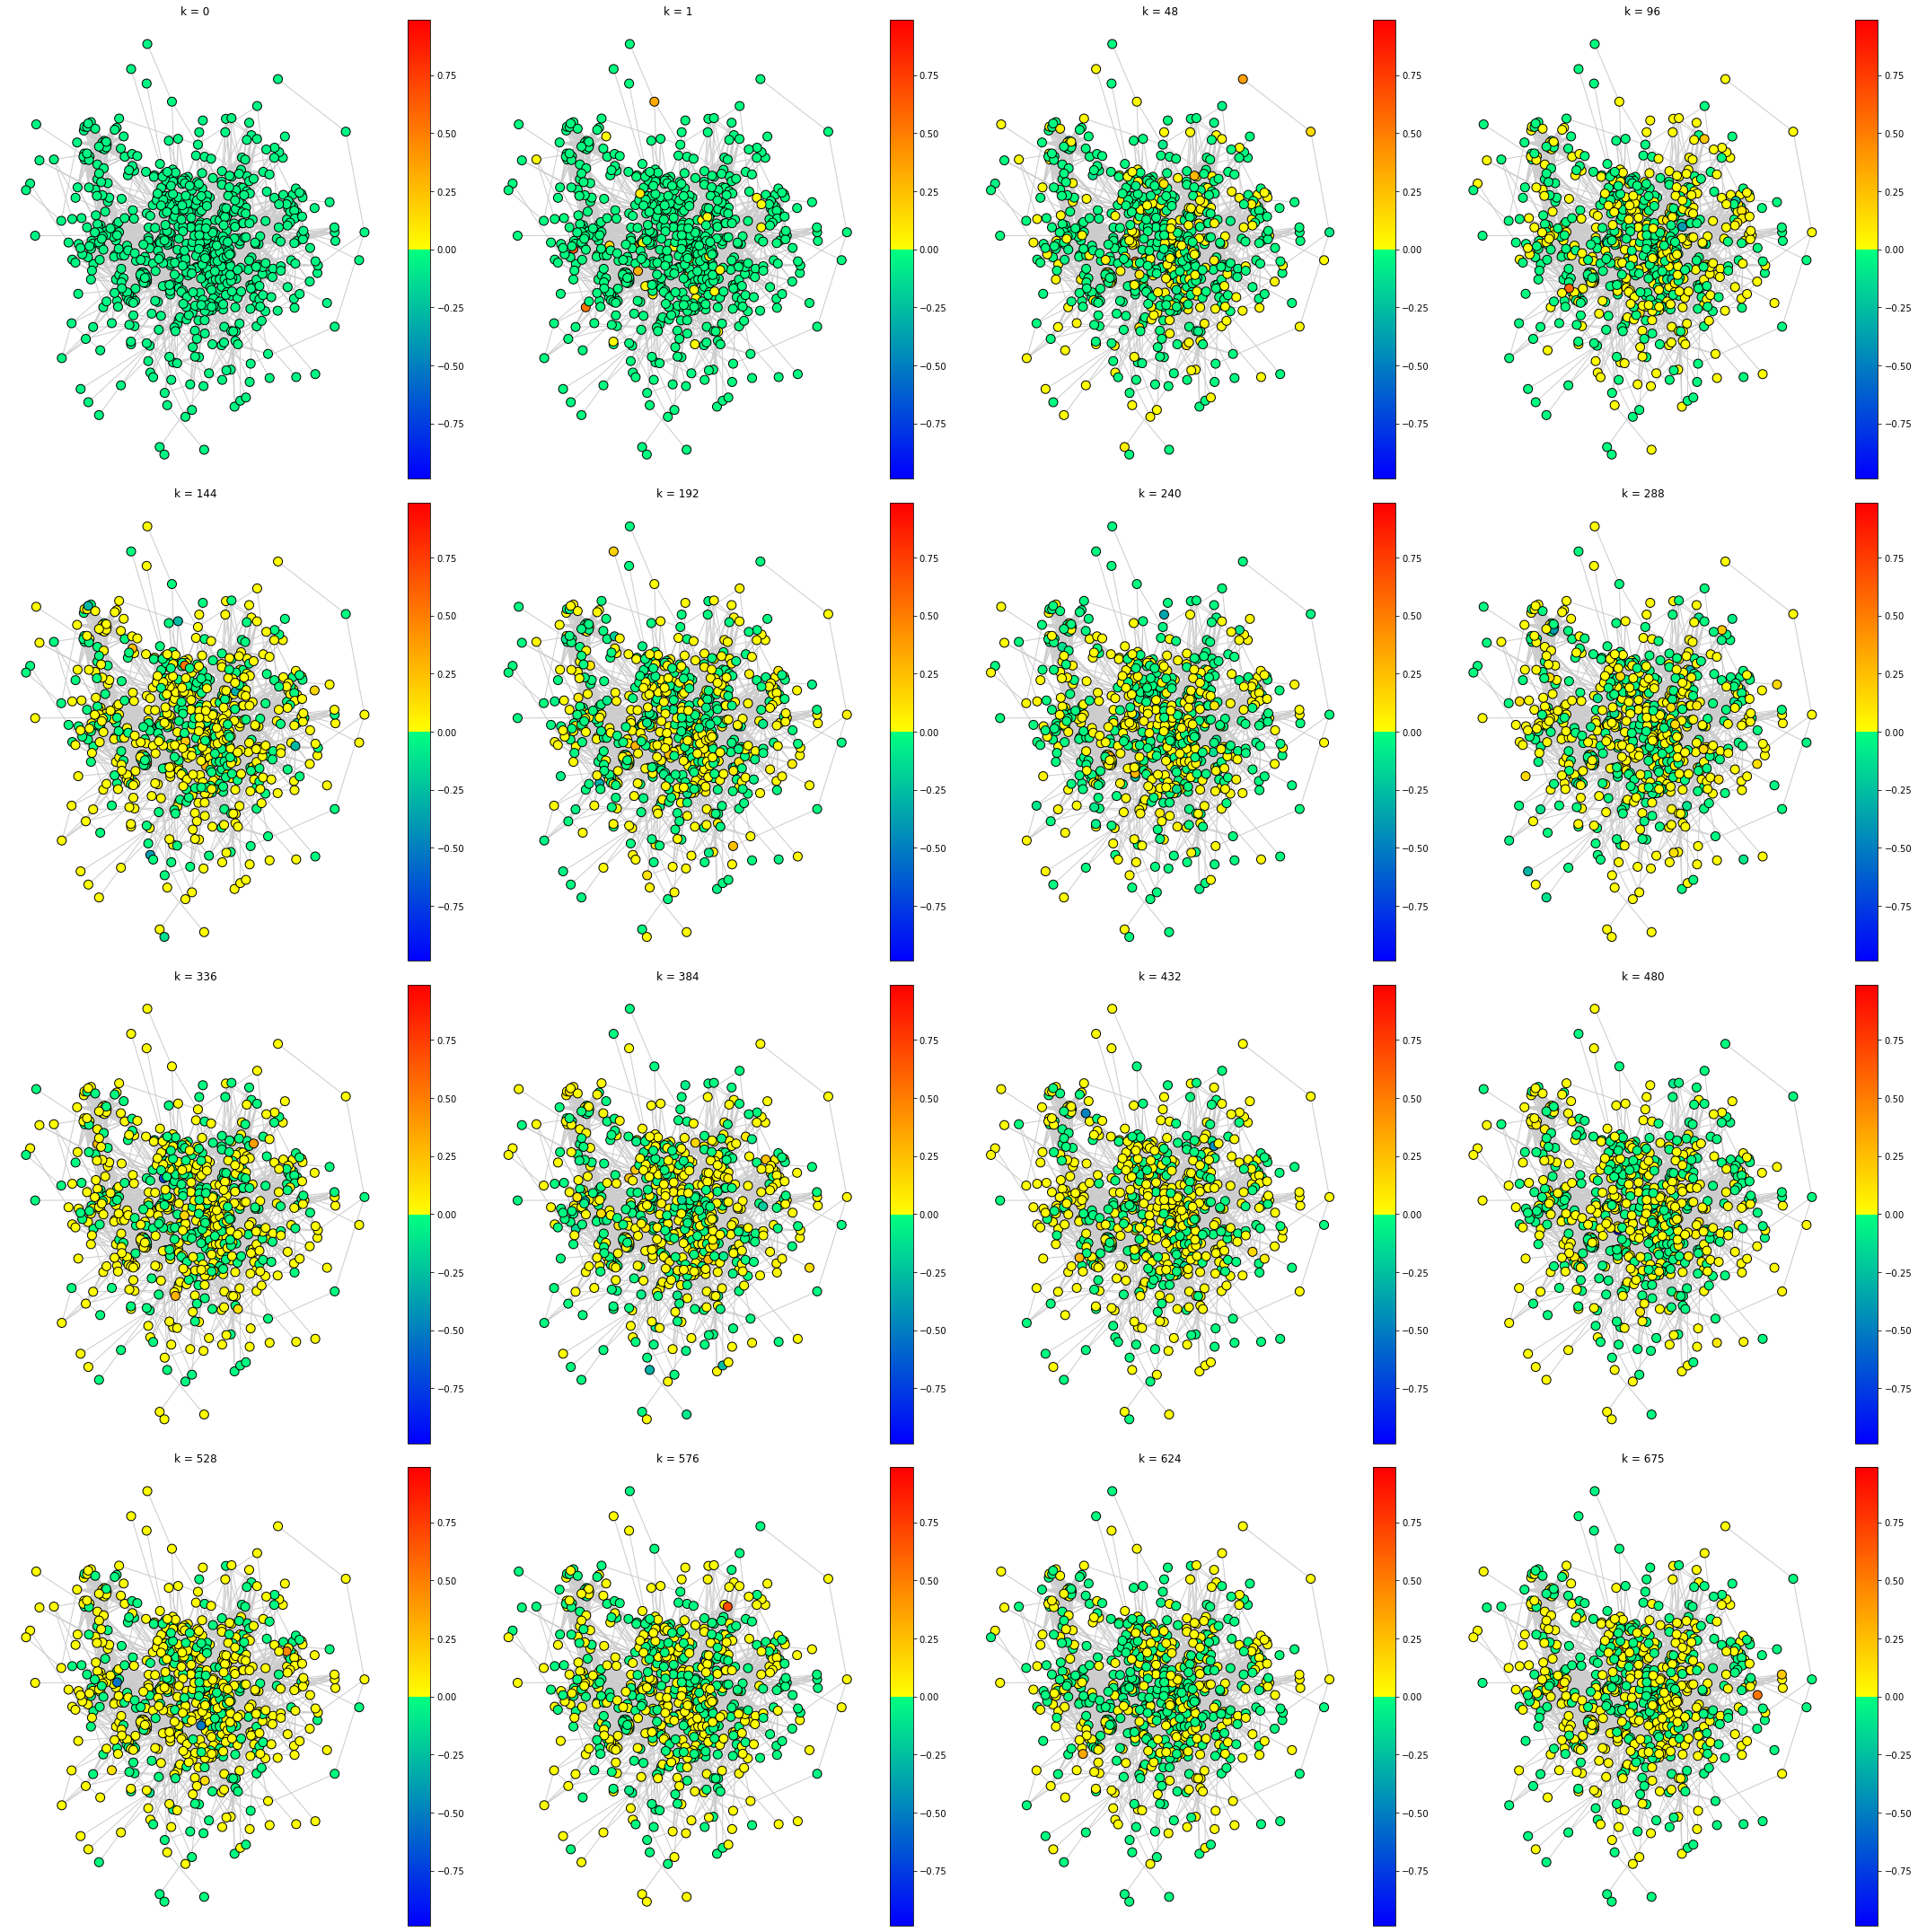

In [36]:
n0 = 4
n_sub = n0 ** 2
base = len(eig[0]) // (n_sub - 2)
k_lst0 = [0, 1]
k_lst1 = [x * base for x in range(1, n_sub-2)]
k_lst2 = [len(eig[0])-1]
k_lst = k_lst0 + k_lst1 + k_lst2
vmin, vmax = change_scale(eig)
for i, k in enumerate(k_lst):
    plt.subplot(n0, n0, i+1)
    draw_sub(k, eig, giant, layout, ccmap, vmin, vmax)
plt.tight_layout()
plt.show()

## Plot gene expression network

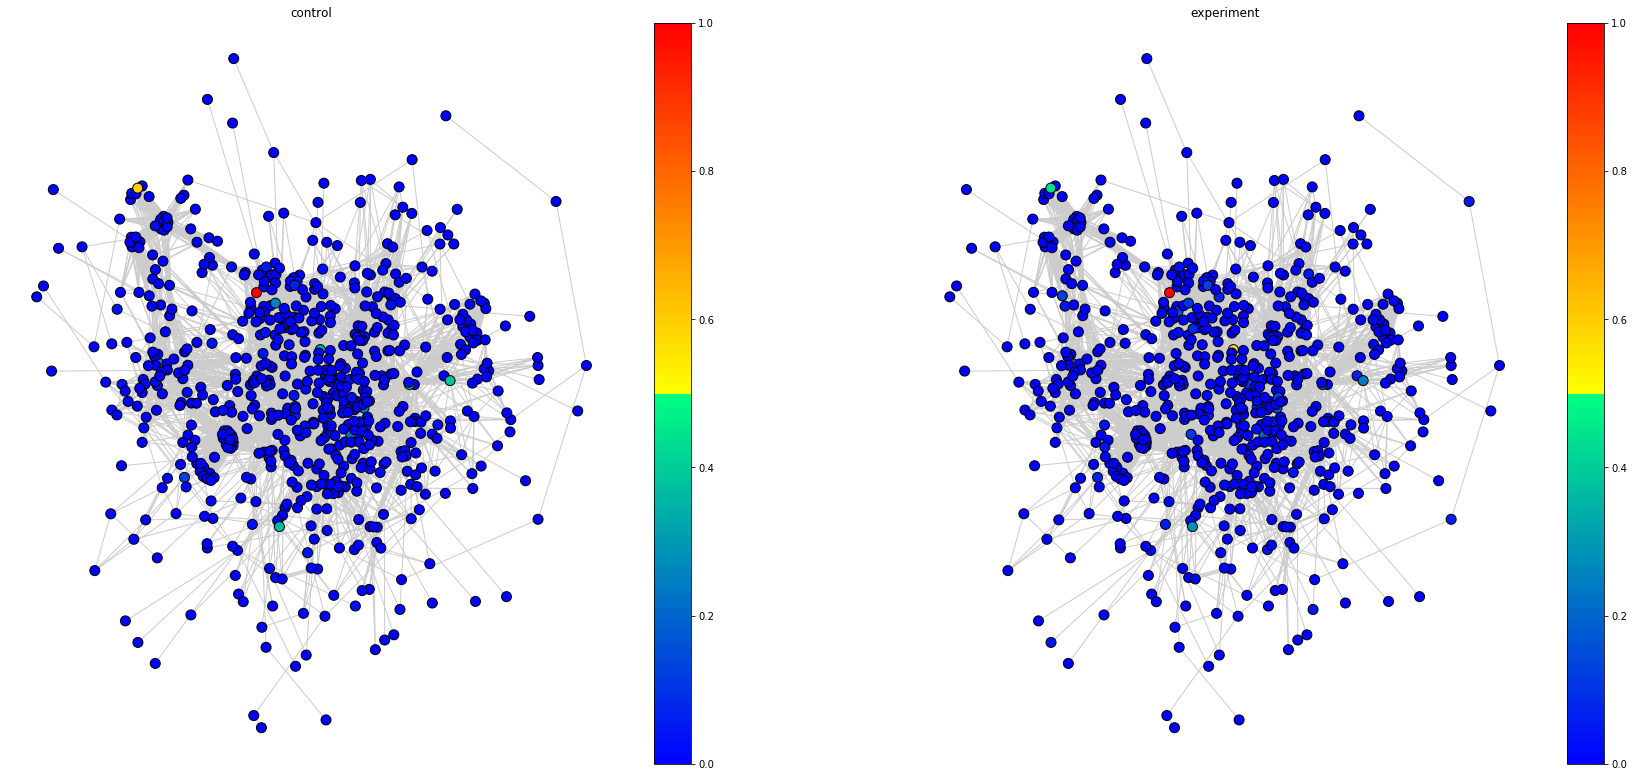

In [37]:
for i, title in enumerate(['control', 'experiment']):
    plt.subplot(2, 2, i+1)
    vec = dh2.iloc[:, i]
    vmax_exp = np.max(vec)
    vmin_exp = np.min(vec)
    nx.draw(giant, layout, node_size=100, node_color=vec, edge_color="#cccccc", edgecolors='#000000', cmap=ccmap, vmin=vmin_exp, vmax=vmax_exp)
    plt.axis('off')
#     sm = plt.cm.ScalarMappable(cmap=ccmap, norm=plt.Normalize(vmin=vmin_exp, vmax=vmax_exp))
    sm = plt.cm.ScalarMappable(cmap=ccmap)
    sm.set_array([])
    plt.colorbar(sm)
    plt.title(title)
plt.show()

## Compute Correlation Coefficients

In [38]:
from scipy.stats import pearsonr, spearmanr
p_lst = []
ppv_lst = []
s_lst = []
spv_lst = []
compare = dh2.diff0
for i in range(len(eig[1])):
    p_lst.append(pearsonr(eig[1].real.T[i].tolist()[0], compare)[0])
    ppv_lst.append(pearsonr(eig[1].real.T[i].tolist()[0], compare)[1])
    s_lst.append(spearmanr(eig[1].real.T[i].tolist()[0], compare)[0])
    spv_lst.append(spearmanr(eig[1].real.T[i].tolist()[0], compare)[1])
i_p = np.argmax(np.abs(p_lst))
i_s = np.argmax(np.abs(s_lst))
print(i_p, i_s)
print((p_lst[i_p], ppv_lst[i_p]))
print((s_lst[i_s], spv_lst[i_s]))

364 197
(0.19967798392255853, 1.651403911484203e-07)
(0.2717323999012909, 6.592013500421056e-13)


### Shuffle vector

In [39]:
dh2_shfl = dh2.sample(frac=1)
p_lst = []
ppv_lst = []
s_lst = []
spv_lst = []
compare = dh2_shfl.diff0
for i in range(len(eig[1])):
    p_lst.append(pearsonr(eig[1].real.T[i].tolist()[0], compare)[0])
    ppv_lst.append(pearsonr(eig[1].real.T[i].tolist()[0], compare)[1])
    s_lst.append(spearmanr(eig[1].real.T[i].tolist()[0], compare)[0])
    spv_lst.append(spearmanr(eig[1].real.T[i].tolist()[0], compare)[1])
i_p = np.argmax(np.abs(p_lst))
i_s = np.argmax(np.abs(s_lst))
print(i_p, i_s)
print((p_lst[i_p], ppv_lst[i_p]))
print((s_lst[i_s], spv_lst[i_s]))

38 407
(-0.2684115547232395, 1.2803875199454993e-12)
(0.12558358646848444, 0.001067544063467681)


### Draw distribution

In [40]:
n = 100
corr_lst = []
pv_lst = []
for _ in range(n):
    dh2_shfl = dh2.sample(frac=1)
    p_lst = []
    ppv_lst = []
    s_lst = []
    spv_lst = []
    compare = dh2_shfl.diff0
    for i in range(len(eig[1])):
        p_lst.append(pearsonr(eig[1].real.T[i].tolist()[0], compare)[0])
        ppv_lst.append(pearsonr(eig[1].real.T[i].tolist()[0], compare)[1])
        s_lst.append(spearmanr(eig[1].real.T[i].tolist()[0], compare)[0])
        spv_lst.append(spearmanr(eig[1].real.T[i].tolist()[0], compare)[1])
    i_p = np.argmax(np.abs(p_lst))
    i_s = np.argmax(np.abs(s_lst))
    
    ps = np.argmax([np.abs(p_lst[i_p]), np.abs(s_lst[i_s])])
    # use absolute value of corr coe
    corr_lst.append((np.abs(p_lst[i_p]), np.abs(s_lst[i_s]))[ps])
    pv_lst.append((ppv_lst[i_p], spv_lst[i_s])[ps])



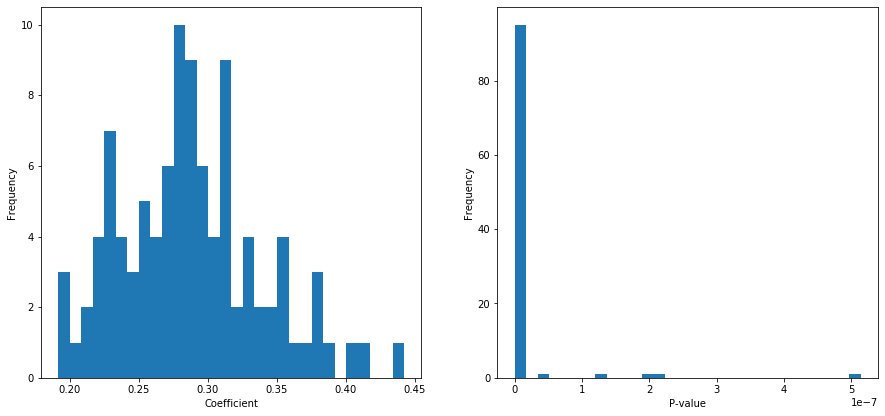

In [45]:
plt.rc('figure', figsize=(15, 15))
plt.subplot(2,2,1)
plt.hist(corr_lst, bins=30)
plt.xlabel('Coefficient')
plt.ylabel('Frequency')
plt.subplot(2,2,2)
plt.hist(pv_lst, bins=30)
plt.xlabel('P-value')
plt.ylabel('Frequency')
# plt.xscale('log')
plt.show()